# 基本绘图

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#条形堆叠图" data-toc-modified-id="条形堆叠图-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>条形堆叠图</a></span></li><li><span><a href="#横向条形堆叠图" data-toc-modified-id="横向条形堆叠图-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>横向条形堆叠图</a></span></li><li><span><a href="#箱图" data-toc-modified-id="箱图-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>箱图</a></span></li><li><span><a href="#直方图" data-toc-modified-id="直方图-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>直方图</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 条形堆叠图

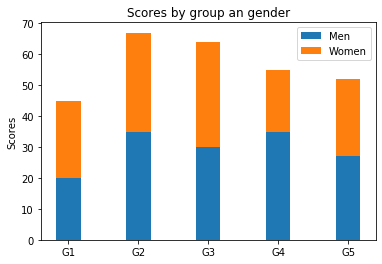

In [5]:
# group标签
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# 柱子的宽度
width = .35
# 数据
men = [20, 35, 30, 35, 27]
women = [25, 32, 34, 20, 25]

fig, ax = plt.subplots()
ax.bar(labels, men, width=width, label='Men')
# 设置底部数据实现堆叠
ax.bar(labels, women, width=width, label='Women', bottom=men)
ax.set_ylabel('Scores')
ax.set_title('Scores by group an gender')
ax.legend()

plt.show()

## 横向条形堆叠图

In [6]:
# 标签
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
# 数据集
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    返回figure和绘图axes
    result: 数据集
    category_names: 标签，且长度与数据尺寸匹配
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

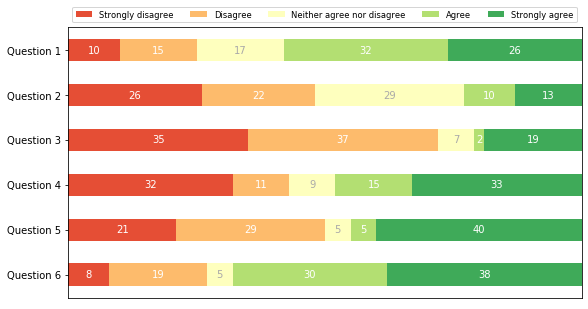

In [7]:
fig, ax = survey(results, category_names)
plt.show()

## 箱图

In [8]:
# 生成随机测试数据
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

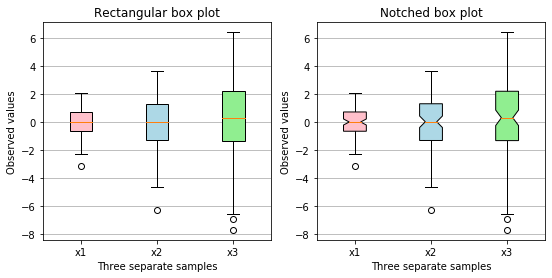

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(all_data,
#                      vert=True,  
                     patch_artist=True,
                     labels=labels)
ax1.set_title('Rectangular box plot')

# notch shape box plot
bplot2 = ax2.boxplot(all_data,
                     notch=True,  # 设置切口
                     vert=True,  # 垂直箱图
                     patch_artist=True,  # 设置填充模式
                     labels=labels)  # 作用在xticklabels上
ax2.set_title('Notched box plot')

# 填充颜色
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)   # 设置横向grid
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()

## 直方图

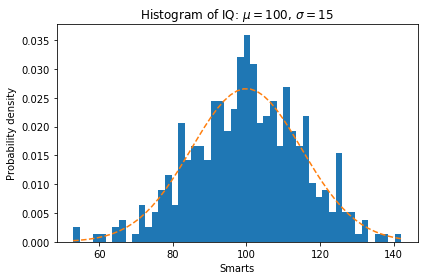

In [17]:
# 设置随机数种子
np.random.seed(19680801)
# 生成数据
mu = 100  # 分布均值
sigma = 15  # 分布标准偏差
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# 绘制频率直方图
n, bins, patches = ax.hist(x, num_bins, density=True)

# 绘制最佳拟合line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# 紧密布局
fig.tight_layout()
plt.show()